In [76]:
import pandas as pd 
import geopandas as gpd 
import numpy as np 

import os 
import sys 

from glob import glob 
from tqdm import tqdm 

In [77]:
ct_nyc = gpd.read_file("data/ctwi_nyc/nyct2020wi.shp")


<Axes: >

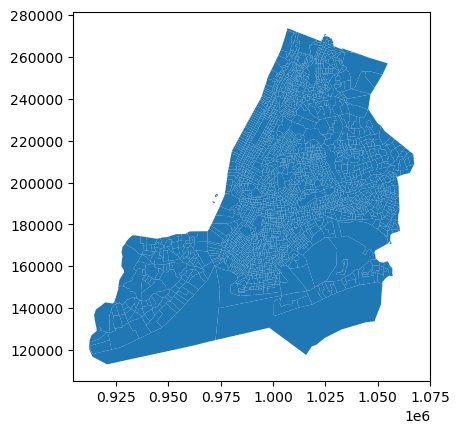

In [78]:
ct_nyc.plot()

In [79]:
ct_nyc[ct_nyc['BoroCT2020'].duplicated()]

,CTLabel,BoroCode,BoroName,CT2020,BoroCT2020,CDEligibil,NTAName,NTA2020,CDTA2020,CDTANAME,GEOID,PUMA,Shape_Leng,Shape_Area,geometry
2278,9901,5,Staten Island,990100,5990100,None,Hoffman & Swinburne Islands,SI9591,SI95,SI95 Great Kills Park-Fort Wadsworth (JIA 95 A...,36085990100,4502,180265.168015,8.642742e+08,"POLYGON ((956799.250 121081.708, 947768.978 11..."
2279,9901,3,Brooklyn,990100,5990100,None,Hoffman & Swinburne Islands,SI9591,SI95,SI95 Great Kills Park-Fort Wadsworth (JIA 95 A...,36047990100,4502,99576.024212,1.917492e+08,"POLYGON ((979747.026 147371.921, 984048.447 14..."


In [80]:
entire_set = pd.read_csv("notebooks/cambrian/entire_sep29_all.csv", engine='pyarrow')

In [81]:
entire_md = pd.read_csv("/share/ju/urban-fingerprinting/output/default/df/2023-09-29/md.csv", engine='pyarrow')

In [82]:
entire_set['frame_id'] = entire_set['image_path'].apply(lambda x: x.split('/')[-1].split('.')[0].split('_')[-1])

In [83]:
entire_set['frame_id']

0         6bc60df5f33f5cf2294496d9f27502f3
1         dcea5a8493728ed92e82076cb314e2f5
2         c47a062296042caf805fe95df112d979
3         09dd1bcb9e346df3856f2172e610e396
4         12fca2907ef5099853aebd182a237ab3
                        ...               
926207    9d821c282c02e6ec3ba98777b32824ee
926208    37786df8890401b51100039725ab1d7a
926209    ca3fa4d857b65d1cae2725df78f6060b
926210    5c26c6aecd86f91a27f33cf6085a1bfc
926211    059aa4fa0a7a60da5f243a990753bc77
Name: frame_id, Length: 926212, dtype: object

In [84]:
entire_set = entire_md.merge(entire_set, on='frame_id', how='left')

In [85]:
entire_set = gpd.GeoDataFrame(entire_set, geometry=gpd.points_from_xy(entire_set['gps_info.longitude'], entire_set['gps_info.latitude'], crs='EPSG:4326')).to_crs('EPSG:2263')

In [86]:
entire_set.describe()

,,camera_heading,captured_at,timezone_offset,h3_index_res12,frame_quality,gps_info.longitude,gps_info.latitude,osm_info.osm_node_id_from,osm_info.osm_node_id_to,h3_12,h3_index_res06,Unnamed: 0.1,sentiment_1,sentiment_2
count,926212.000000,926212.000000,9.262120e+05,926212.0,9.262120e+05,926212.000000,926212.000000,926212.000000,9.262120e+05,9.262120e+05,9.208310e+05,9.262120e+05,406.000000,926212.000000,926212.000000
mean,28712.949361,179.559775,1.696009e+12,-14400.0,6.312439e+17,0.797860,-73.918321,40.725298,4.375140e+09,4.456266e+09,6.312439e+17,6.042223e+17,202.500000,0.001582,0.146341
std,26410.010055,105.739324,1.190899e+07,0.0,1.212162e+10,0.090021,0.079832,0.069577,3.872608e+09,3.894543e+09,1.212618e+10,1.211954e+10,117.346353,0.039739,0.353448
min,0.000000,-1.000000,1.695960e+12,-14400.0,6.312439e+17,0.600002,-74.252436,40.501651,3.375199e+07,3.375199e+07,6.312439e+17,6.042223e+17,0.000000,0.000000,0.000000
25%,9500.000000,85.247789,1.695999e+12,-14400.0,6.312439e+17,0.733977,-73.977392,40.676344,2.775759e+08,2.775765e+08,6.312439e+17,6.042223e+17,101.250000,0.000000,0.000000
50%,22316.000000,185.798943,1.696010e+12,-14400.0,6.312439e+17,0.797787,-73.930622,40.726174,4.205052e+09,4.207864e+09,6.312439e+17,6.042223e+17,202.500000,0.000000,0.000000
75%,39158.000000,271.953918,1.696019e+12,-14400.0,6.312439e+17,0.860643,-73.861933,40.764087,8.282796e+09,8.309479e+09,6.312439e+17,6.042223e+17,303.750000,0.000000,0.000000
max,133965.000000,360.000000,1.696046e+12,-14400.0,6.312440e+17,1.000000,-73.699181,40.915799,1.031553e+10,1.031553e+10,6.312440e+17,6.042224e+17,405.000000,1.000000,1.000000


In [87]:
# merge entire_set with cts_nyc 
entire_set = gpd.sjoin_nearest(entire_set, ct_nyc)


In [88]:
entire_set.describe()

,,camera_heading,captured_at,timezone_offset,h3_index_res12,frame_quality,gps_info.longitude,gps_info.latitude,osm_info.osm_node_id_from,osm_info.osm_node_id_to,h3_12,h3_index_res06,Unnamed: 0.1,sentiment_1,sentiment_2,index_right,Shape_Leng,Shape_Area
count,926212.000000,926212.000000,9.262120e+05,926212.0,9.262120e+05,926212.000000,926212.000000,926212.000000,9.262120e+05,9.262120e+05,9.208310e+05,9.262120e+05,406.000000,926212.000000,926212.000000,926212.000000,926212.000000,9.262120e+05
mean,28712.949361,179.559775,1.696009e+12,-14400.0,6.312439e+17,0.797860,-73.918321,40.725298,4.375140e+09,4.456266e+09,6.312439e+17,6.042223e+17,202.500000,0.001582,0.146341,1274.431652,12852.711515,1.188243e+07
std,26410.010055,105.739324,1.190899e+07,0.0,1.212162e+10,0.090021,0.079832,0.069577,3.872608e+09,3.894543e+09,1.212618e+10,1.211954e+10,117.346353,0.039739,0.353448,746.713254,14479.884599,3.281061e+07
min,0.000000,-1.000000,1.695960e+12,-14400.0,6.312439e+17,0.600002,-74.252436,40.501651,3.375199e+07,3.375199e+07,6.312439e+17,6.042223e+17,0.000000,0.000000,0.000000,1.000000,2569.477970,4.206011e+05
25%,9500.000000,85.247789,1.695999e+12,-14400.0,6.312439e+17,0.733977,-73.977392,40.676344,2.775759e+08,2.775765e+08,6.312439e+17,6.042223e+17,101.250000,0.000000,0.000000,645.000000,5818.320438,1.872371e+06
50%,22316.000000,185.798943,1.696010e+12,-14400.0,6.312439e+17,0.797787,-73.930622,40.726174,4.205052e+09,4.207864e+09,6.312439e+17,6.042223e+17,202.500000,0.000000,0.000000,1280.000000,7759.427476,2.656996e+06
75%,39158.000000,271.953918,1.696019e+12,-14400.0,6.312439e+17,0.860643,-73.861933,40.764087,8.282796e+09,8.309479e+09,6.312439e+17,6.042223e+17,303.750000,0.000000,0.000000,2000.000000,12467.867027,6.621400e+06
max,133965.000000,360.000000,1.696046e+12,-14400.0,6.312440e+17,1.000000,-73.699181,40.915799,1.031553e+10,1.031553e+10,6.312440e+17,6.042224e+17,405.000000,1.000000,1.000000,2326.000000,134229.357167,2.569817e+08


In [89]:
inspection_set_annotated = pd.read_csv("data/processed/inspection_set.csv")

In [90]:
inspection_set_annotated['frame_id'] = inspection_set_annotated['image'].apply(lambda x: x.split('/')[-1].split('.')[0].split('_')[-1])
inspection_set_annotated['choice'] = inspection_set_annotated['choice'].apply(lambda x: 1 if x == 'Flooded road' else 0)
# drop everything except frame_id and choice 
inspection_set_annotated['pred'] = inspection_set_annotated['sentiment_1']

inspection_set_annotated['tp'] = ((inspection_set_annotated['choice'] == 1) & (inspection_set_annotated['pred'] == 1)).astype(int)
inspection_set_annotated['fp'] = ((inspection_set_annotated['choice'] == 0) & (inspection_set_annotated['pred'] == 1)).astype(int)
inspection_set_annotated['tn'] = ((inspection_set_annotated['choice'] == 0) & (inspection_set_annotated['pred'] == 0)).astype(int)
inspection_set_annotated['fn'] = ((inspection_set_annotated['choice'] == 1) & (inspection_set_annotated['pred'] == 0)).astype(int)

inspection_set_annotated = inspection_set_annotated[['frame_id', 'choice', 'pred', 'tp', 'fp', 'tn', 'fn']]


inspection_set_annotated.describe()

,choice,pred,tp,fp,tn,fn
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.332000,0.50000,0.329000,0.171000,0.497000,0.003000
std,0.471167,0.50025,0.470085,0.376697,0.500241,0.054717
min,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.50000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.00000,1.000000,0.000000,1.000000,0.000000
max,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000


In [91]:
inspection_set_annotated['pred'].value_counts()

pred
1    500
0    500
Name: count, dtype: int64

In [92]:
# merge inspection_set_annotated with entire_set
entire_set = entire_set.merge(inspection_set_annotated, on='frame_id', how='left')
entire_set.isna().sum()

                                  0
frame_id                          0
frame_url                         0
camera_heading                    0
captured_at                       0
timezone_offset                   0
h3_index_res12                    0
thumbnail_url                     0
direction                         0
frame_quality                     0
frame_context                     0
gps_info.longitude                0
gps_info.latitude                 0
osm_info.osm_node_id_from         0
osm_info.osm_node_id_to           0
osm_info.road_type                0
h3_12                          5381
h3_index_res06                    0
geometry                          0
image_path                        0
q1                                0
q2                                0
response_1                        0
response_2                        0
Unnamed: 0.1                 925806
sentiment_1                       0
sentiment_2                       0
index_right                 

In [93]:
# get number of total images and number of sentiment_1 == 1 images in each census tract 




by_ct = entire_set.groupby('BoroCT2020').agg({'frame_id':'count', 'sentiment_1':'sum', 'tp': 'sum', 'fp': 'sum', 'tn': 'sum', 'fn': 'sum' }).fillna(0).reset_index()
by_ct.columns = ['BoroCT2020', 'n_total', 'n_classified_positive', 'n_tp', 'n_fp', 'n_tn', 'n_fn']

In [94]:
ct_nyc = ct_nyc.merge(by_ct, on='BoroCT2020', how='left').fillna(0) 

/tmp/ipykernel_1898310/3908676694.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ct_nyc = ct_nyc.merge(by_ct, on='BoroCT2020', how='left').fillna(0)


In [95]:
ct_nyc['n_classified_positive'].describe() 

count    2327.000000
mean        0.629566
std         2.647594
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        60.000000
Name: n_classified_positive, dtype: float64

In [96]:
ct_nyc['n_classified_positive'].sum()

1465.0

In [97]:
ct_nyc['n_total'].describe()

count     2327.000000
mean       398.028363
std        742.079395
min          0.000000
25%        124.000000
50%        217.000000
75%        439.000000
max      20714.000000
Name: n_total, dtype: float64

In [98]:
ct_nyc['n_total'].sum()

926212.0

In [99]:
ct_nyc['n_tp'].sum()

329.0

In [100]:
ct_nyc['n_fp'].sum()

171.0

In [101]:
ct_nyc['n_tn'].sum()

497.0

In [102]:
ct_nyc['n_fn'].sum()

3.0

In [103]:
ct_nyc['total_not_annotated'] = ct_nyc['n_total'] - (ct_nyc['n_tp'] + ct_nyc['n_fp'] + ct_nyc['n_tn'] + ct_nyc['n_fn'])
# CHECK CODE HERE, send emma descriptive stats of updated ct level dataset
ct_nyc['positives_not_annotated'] = ct_nyc['n_classified_positive'] - (ct_nyc['n_tp'] + ct_nyc['n_fp'])
ct_nyc['negatives_not_annotated'] = ct_nyc['n_total'] - ct_nyc['n_classified_positive'] - (ct_nyc['n_tn'] + ct_nyc['n_fn'])

In [104]:
ct_nyc['total_not_annotated'].describe()

count     2327.000000
mean       397.598625
std        741.031526
min          0.000000
25%        124.000000
50%        217.000000
75%        439.000000
max      20678.000000
Name: total_not_annotated, dtype: float64

In [105]:
ct_nyc['positives_not_annotated'].describe()

count    2327.000000
mean        0.414697
std         1.808884
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        39.000000
Name: positives_not_annotated, dtype: float64

In [106]:
ct_nyc['negatives_not_annotated'].describe()

count     2327.000000
mean       397.183928
std        739.923455
min          0.000000
25%        123.000000
50%        217.000000
75%        437.000000
max      20639.000000
Name: negatives_not_annotated, dtype: float64

In [107]:
ct_nyc 

,CTLabel,BoroCode,BoroName,CT2020,BoroCT2020,CDEligibil,NTAName,NTA2020,CDTA2020,CDTANAME,...,geometry,n_total,n_classified_positive,n_tp,n_fp,n_tn,n_fn,total_not_annotated,positives_not_annotated,negatives_not_annotated
0,1,1,Manhattan,000100,1000100,0,The Battery-Governors Island-Ellis Island-Libe...,MN0191,MN01,MN01 Financial District-Tribeca (CD 1 Equivalent),...,"MULTIPOLYGON (((972081.788 190733.467, 972184....",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.01,1,Manhattan,000201,1000201,0,Chinatown-Two Bridges,MN0301,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),...,"POLYGON ((988012.660 196152.484, 987984.769 19...",320.0,0.0,0.0,0.0,0.0,0.0,320.0,0.0,320.0
2,6,1,Manhattan,000600,1000600,0,Chinatown-Two Bridges,MN0301,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),...,"POLYGON ((986961.185 199553.643, 987206.139 19...",845.0,2.0,1.0,0.0,1.0,0.0,843.0,1.0,842.0
3,14.01,1,Manhattan,001401,1001401,0,Lower East Side,MN0302,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),...,"POLYGON ((987382.076 199473.760, 987206.139 19...",182.0,0.0,0.0,0.0,0.0,0.0,182.0,0.0,182.0
4,14.02,1,Manhattan,001402,1001402,0,Lower East Side,MN0302,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),...,"POLYGON ((988536.642 200278.524, 988404.814 19...",771.0,0.0,0.0,0.0,1.0,0.0,770.0,0.0,770.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2322,176,5,Staten Island,017600,5017600,0,Annadale-Huguenot-Prince's Bay-Woodrow,SI0304,SI03,SI03 South Shore (CD 3 Approximation),...,"POLYGON ((938074.526 134571.590, 938187.252 13...",76.0,0.0,0.0,0.0,0.0,0.0,76.0,0.0,76.0
2323,228.02,5,Staten Island,022802,5022802,0,Freshkills Park (North),SI0291,SI02,SI02 Mid-Island (CD 2 Approximation),...,"POLYGON ((938205.274 154530.769, 937703.178 15...",204.0,1.0,0.0,0.0,0.0,0.0,204.0,1.0,203.0
2324,291.02,5,Staten Island,029102,5029102,0,New Springville-Willowbrook-Bulls Head-Travis,SI0204,SI02,SI02 Mid-Island (CD 2 Approximation),...,"POLYGON ((932410.624 168847.921, 932435.091 16...",1264.0,0.0,0.0,0.0,1.0,0.0,1263.0,0.0,1263.0
2325,161,2,Bronx,016100,2016100,0,Crotona Park East,BX0303,BX03,BX03 Morrisania-Crotona Park East (CD 3 Approx...,...,"POLYGON ((1015839.339 245295.043, 1016167.845 ...",264.0,0.0,0.0,0.0,0.0,0.0,264.0,0.0,264.0


In [108]:
ct_nyc.describe()

,CDEligibil,Shape_Leng,Shape_Area,n_total,n_classified_positive,n_tp,n_fp,n_tn,n_fn,total_not_annotated,positives_not_annotated,negatives_not_annotated
count,2327.0,2327.000000,2.327000e+03,2327.000000,2327.000000,2327.000000,2327.000000,2327.000000,2327.000000,2327.000000,2327.000000,2327.000000
mean,0.0,8723.500538,5.610188e+06,398.028363,0.629566,0.141384,0.073485,0.213580,0.001289,397.598625,0.414697,397.183928
std,0.0,8777.426112,3.473142e+07,742.079395,2.647594,0.774842,0.445882,0.642053,0.035890,741.031526,1.808884,739.923455
min,0.0,2569.477970,4.206011e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,5564.960679,1.646620e+06,124.000000,0.000000,0.000000,0.000000,0.000000,0.000000,124.000000,0.000000,123.000000
50%,0.0,6511.371571,2.005663e+06,217.000000,0.000000,0.000000,0.000000,0.000000,0.000000,217.000000,0.000000,217.000000
75%,0.0,9117.634106,3.516591e+06,439.000000,0.000000,0.000000,0.000000,0.000000,0.000000,439.000000,0.000000,437.000000
max,0.0,216801.001087,1.309240e+09,20714.000000,60.000000,22.000000,16.000000,15.000000,1.000000,20678.000000,39.000000,20639.000000


In [109]:
ct_nyc[['n_total','n_classified_positive','n_tp', 'n_fp', 'n_tn', 'n_fn','total_not_annotated', 'positives_not_annotated','negatives_not_annotated']].sum()

n_total                    926212.0
n_classified_positive        1465.0
n_tp                          329.0
n_fp                          171.0
n_tn                          497.0
n_fn                            3.0
total_not_annotated        925212.0
positives_not_annotated       965.0
negatives_not_annotated    924247.0
dtype: float64

In [110]:
ct_nyc['positives_not_annotated'].sum() + ct_nyc['negatives_not_annotated'].sum()

925212.0

In [111]:
ct_nyc['positives_not_annotated'].sum() + ct_nyc['negatives_not_annotated'].sum() == ct_nyc['total_not_annotated'].sum()

True

In [112]:
os.makedirs("data/processed", exist_ok=True)
ct_nyc.to_csv("data/processed/flooding_ct_dataset.csv", index=False)